In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
X = 6 * np.random.rand(100, 1) - 3
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
# quadratic equation used- y=0.5x^2+1.5x+2+outliers

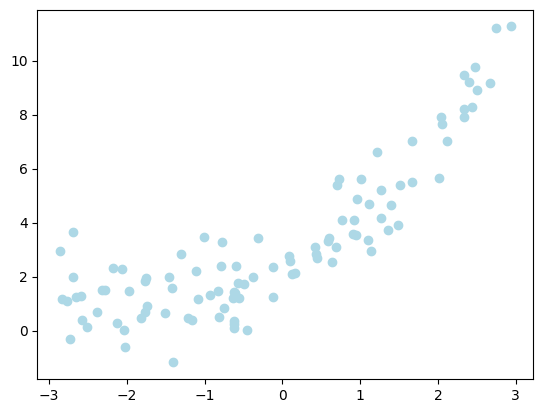

In [5]:
plt.scatter(X , y , color = 'lightblue')

In [7]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 42)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [10]:
regression_1.fit(X_train , y_train)

LinearRegression()

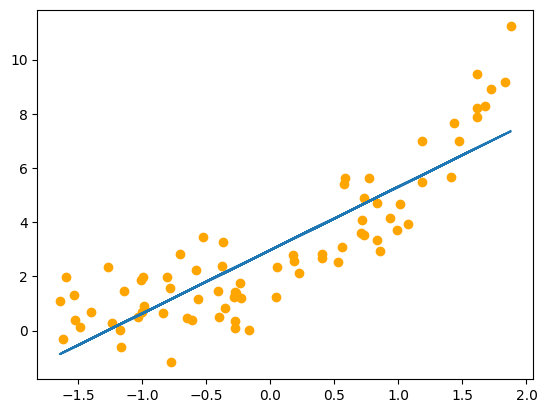

In [13]:
plt.scatter(X_train , y_train , color = 'orange')
plt.plot(X_train , regression_1.predict(X_train))

In [14]:
from sklearn.metrics import r2_score

In [15]:
score = r2_score(y_test , regression_1.predict(X_test))
print(score)

0.5441060477196245


In [17]:
# Applying Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

In [18]:
poly = PolynomialFeatures(degree =2 , include_bias = True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [22]:
regression = LinearRegression()
regression.fit(X_train_poly , y_train)

LinearRegression()

In [19]:
X_train_poly

array([[ 1.00000000e+00, -3.71862442e-01,  1.38281676e-01],
       [ 1.00000000e+00,  1.61260943e+00,  2.60050917e+00],
       [ 1.00000000e+00,  5.03303557e-02,  2.53314470e-03],
       [ 1.00000000e+00,  1.61689950e+00,  2.61436400e+00],
       [ 1.00000000e+00,  1.87762268e+00,  3.52546694e+00],
       [ 1.00000000e+00,  1.61357525e+00,  2.60362508e+00],
       [ 1.00000000e+00, -1.03607355e+00,  1.07344840e+00],
       [ 1.00000000e+00, -1.48414146e+00,  2.20267588e+00],
       [ 1.00000000e+00,  1.72248253e+00,  2.96694607e+00],
       [ 1.00000000e+00,  1.41030444e+00,  1.98895861e+00],
       [ 1.00000000e+00, -2.73444731e-01,  7.47720212e-02],
       [ 1.00000000e+00, -2.74764399e-01,  7.54954750e-02],
       [ 1.00000000e+00, -3.80984030e-01,  1.45148831e-01],
       [ 1.00000000e+00,  5.72351632e-01,  3.27586390e-01],
       [ 1.00000000e+00, -6.53205867e-01,  4.26677904e-01],
       [ 1.00000000e+00,  8.54013571e-01,  7.29339179e-01],
       [ 1.00000000e+00,  7.29451348e-01

In [20]:
X_test_poly

array([[ 1.        , -0.18846236,  0.03551806],
       [ 1.        ,  1.70521808,  2.90776869],
       [ 1.        , -0.25659813,  0.0658426 ],
       [ 1.        ,  0.50262691,  0.25263381],
       [ 1.        , -1.68197664,  2.82904542],
       [ 1.        , -0.0737529 ,  0.00543949],
       [ 1.        ,  1.09080395,  1.18985325],
       [ 1.        ,  0.39455689,  0.15567514],
       [ 1.        ,  0.90342309,  0.81617327],
       [ 1.        , -1.56663467,  2.4543442 ],
       [ 1.        ,  1.42395186,  2.0276389 ],
       [ 1.        , -0.11619106,  0.01350036],
       [ 1.        ,  0.49868812,  0.24868984],
       [ 1.        , -1.7026159 ,  2.89890089],
       [ 1.        , -1.33503726,  1.78232449],
       [ 1.        ,  0.92969015,  0.86432377],
       [ 1.        ,  1.65962943,  2.75436984],
       [ 1.        ,  0.61424469,  0.37729654],
       [ 1.        , -0.47172482,  0.22252431],
       [ 1.        , -1.35795666,  1.84404629],
       [ 1.        ,  0.20649088,  0.042

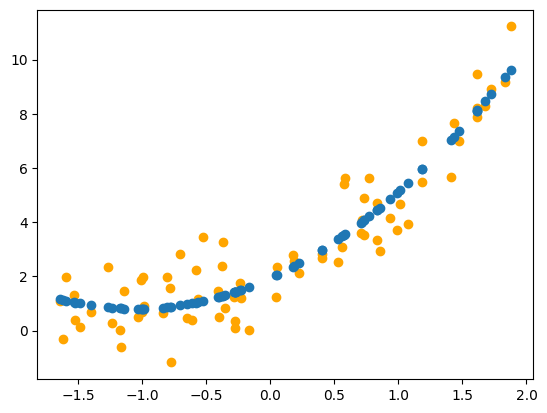

In [26]:
plt.scatter(X_train , y_train , color = 'orange')
plt.scatter(X_train , regression.predict(X_train_poly))

In [28]:
from sklearn.metrics import r2_score

y_pred = regression.predict(X_test_poly)
score = r2_score(y_test , y_pred)
print(score)

0.8801849789000686


In [29]:
# try with degree 3

poly = PolynomialFeatures(degree = 3 , include_bias = True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [30]:
regression = LinearRegression()
regression.fit(X_train_poly , y_train)
y_pred = regression.predict(X_test_poly)

score = r2_score(y_test , y_pred)
print(score)

0.8585826060523027


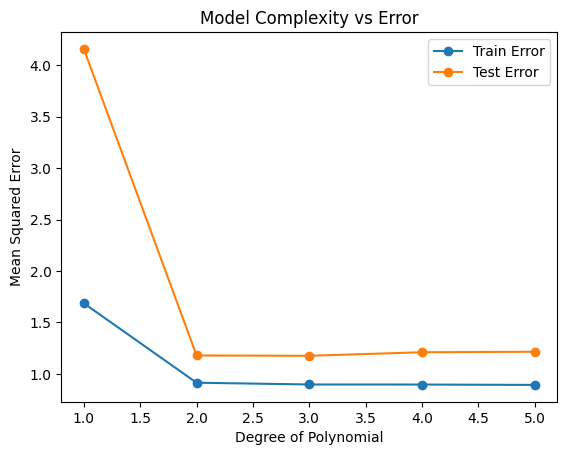

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

degrees = [1, 2, 3, 4, 5]
train_errors = []
test_errors = []

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plot Errors
plt.plot(degrees, train_errors, label="Train Error", marker='o')
plt.plot(degrees, test_errors, label="Test Error", marker='o')
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Squared Error")
plt.title("Model Complexity vs Error")
plt.legend()
plt.show()


In [32]:
from sklearn.model_selection import cross_val_score

# Lowest avg mse is best degree
for d in range(1, 6):
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    scores = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')

    print(f"Degree {d}, Avg MSE: {-scores.mean():.2f}")


Degree 1, Avg MSE: 2.46
Degree 2, Avg MSE: 1.01
Degree 3, Avg MSE: 1.03
Degree 4, Avg MSE: 1.04
Degree 5, Avg MSE: 1.05
